## Life cycle
- Collect Data
- Analyse Data
- Data Wrangling
- Train & Test
- Model
- Accuracy check

## Logistic regression

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [67]:
titanic=pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
print("# of passengers in original data: ", str(len(titanic.index)))

# of passengers in original data:  891


## Analyzing the data

<Axes: xlabel='Survived', ylabel='count'>

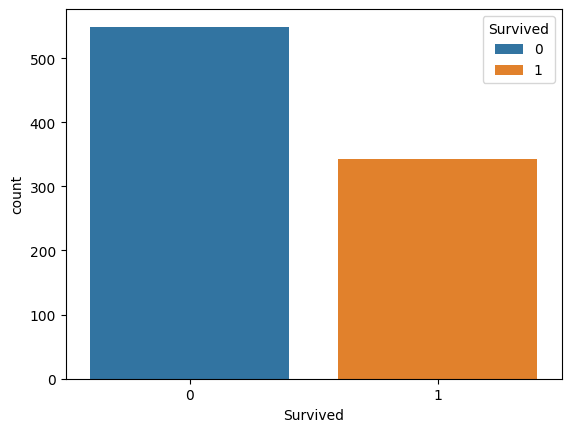

In [69]:
sns.countplot(x='Survived',data=titanic, hue='Survived')

<Axes: xlabel='Survived', ylabel='count'>

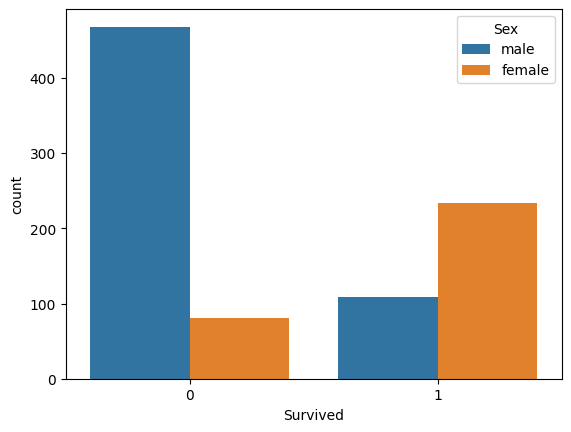

In [70]:
sns.countplot(x="Survived",hue='Sex',data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

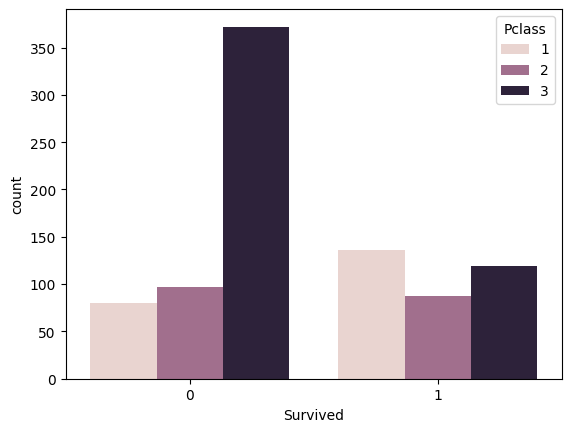

In [71]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

<Axes: ylabel='Frequency'>

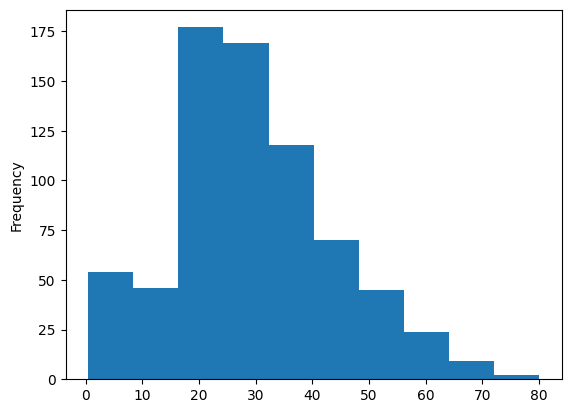

In [72]:
titanic['Age'].plot.hist()

<Axes: ylabel='Frequency'>

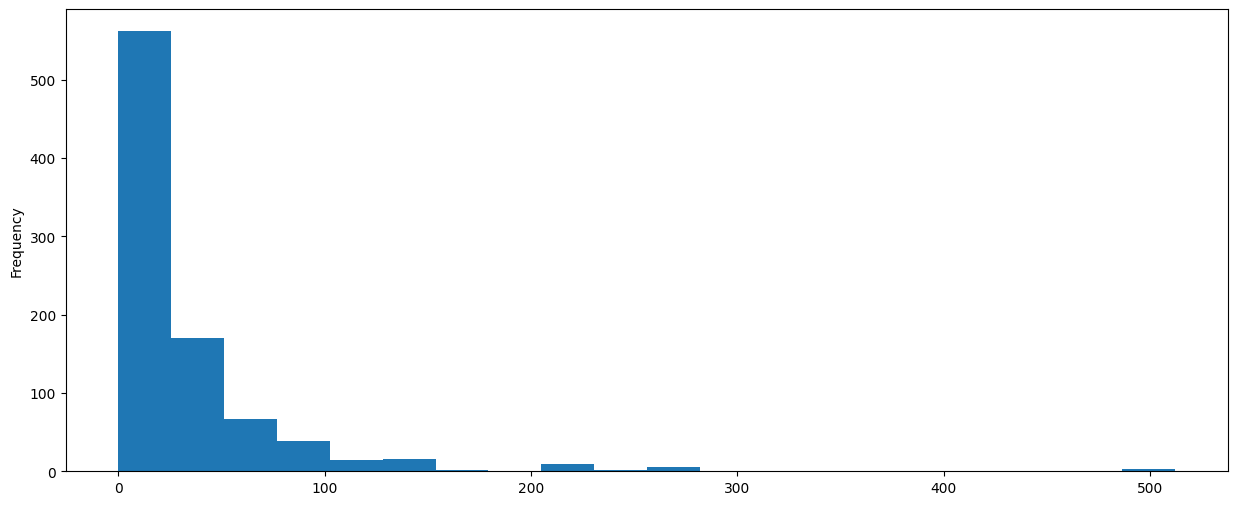

In [73]:
titanic['Fare'].plot.hist(bins=20,figsize=(15,6))

In [74]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

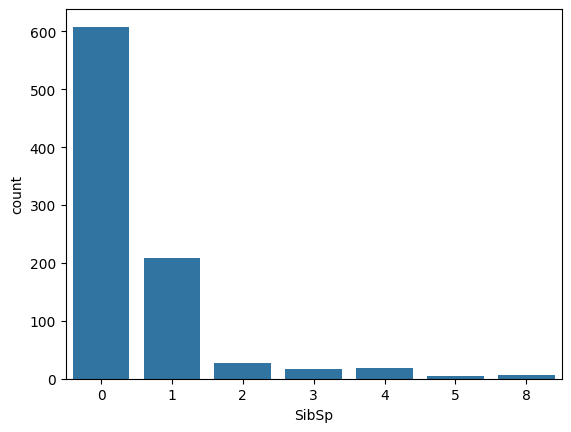

In [75]:
sns.countplot(x=titanic['SibSp'])

<Axes: xlabel='Parch', ylabel='count'>

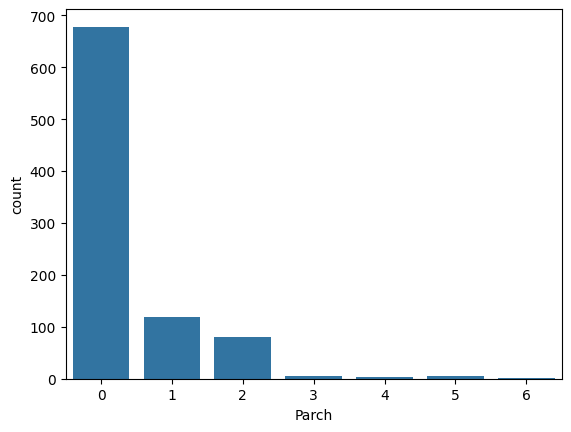

In [76]:
sns.countplot(x='Parch',data=titanic)

## Data Wrangling

In [77]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

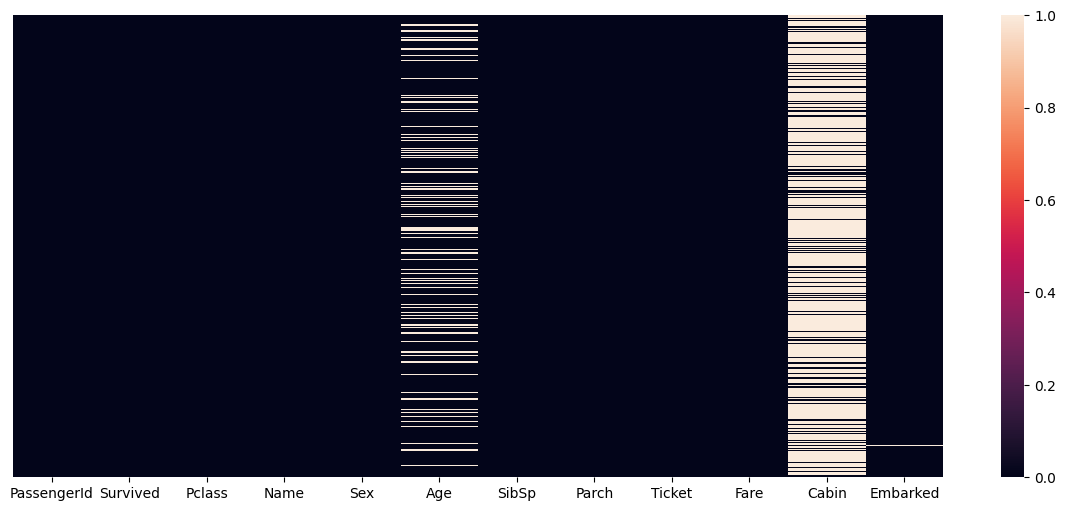

In [78]:
plt.figure(figsize=(15,6))
sns.heatmap(titanic.isna(),yticklabels=False)

<Axes: xlabel='Pclass', ylabel='Age'>

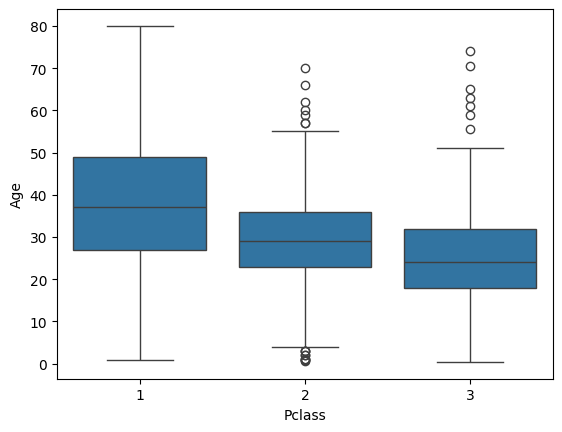

In [79]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [80]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
titanic_age=titanic['Age'].median()
titanic['Age'].fillna(titanic_age,inplace=True)

In [83]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
titanic.drop(columns='Cabin',axis=1,inplace=True)

In [85]:
titanic['Embarked'].mode()[0]

'S'

In [86]:
titanic.fillna(titanic['Embarked'].mode()[0],inplace=True)

In [87]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [88]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

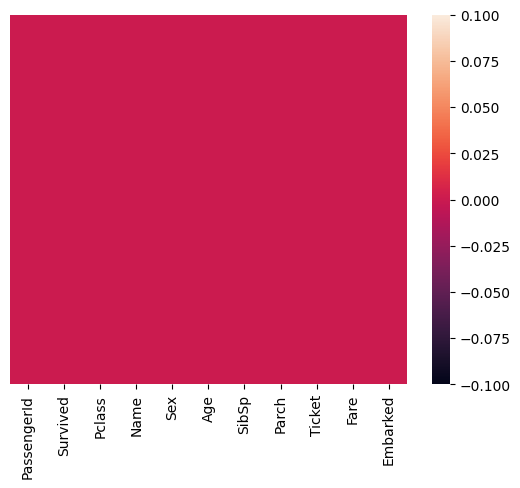

In [89]:
sns.heatmap(titanic.isna(),yticklabels=False)

In [90]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [91]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

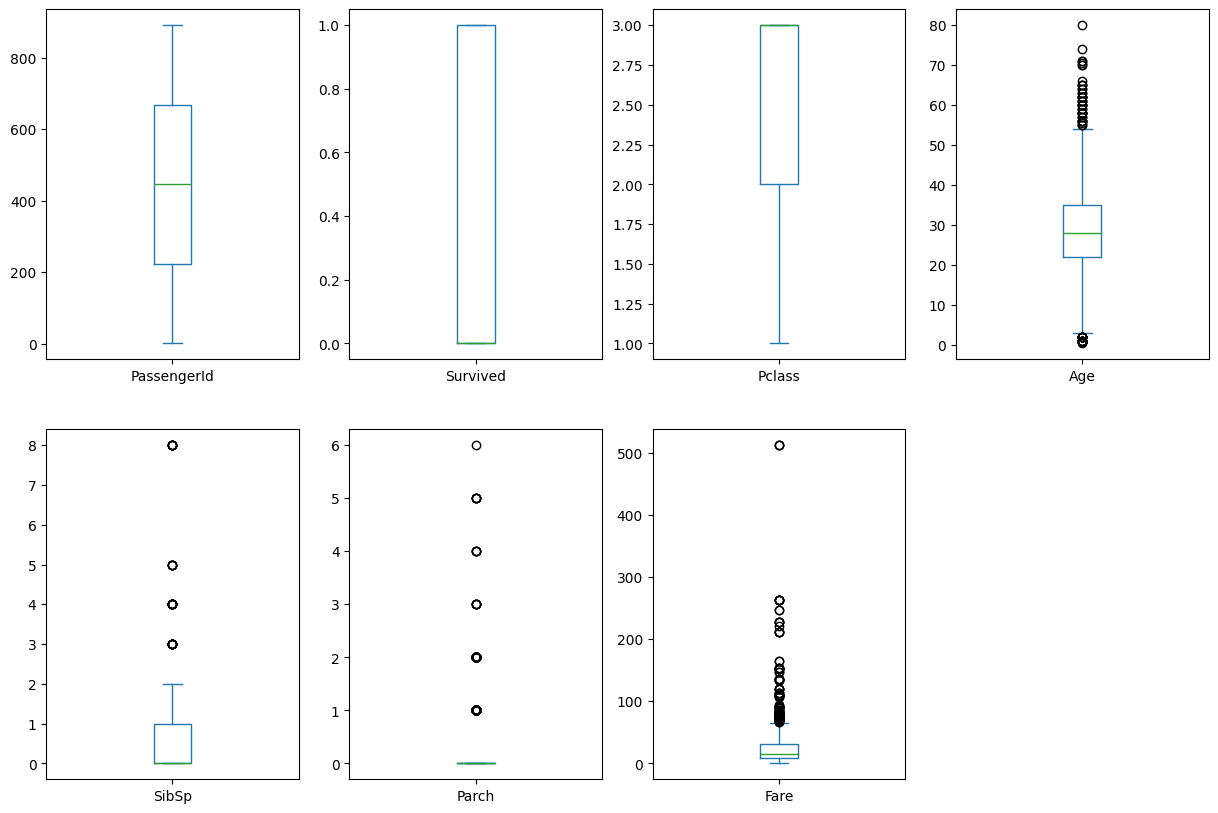

In [92]:
# using boxplot to see outlers in each column
titanic.plot(kind='box', subplots=True, layout=(2,4), figsize=(15, 10))
plt.show()

In [93]:
print('skewness value of Age: ',titanic['Age'].skew())
print('skewness value of Fare: ',titanic['Fare'].skew())
print('skewness value of SibSp: ',titanic['SibSp'].skew())
print('skewness value of Parch: ',titanic['Parch'].skew())
# The skewness should be within the range -1 to 1, other than this indicates the presence of extreme outliers which effects badly on the model

skewness value of Age:  0.5102446555756495
skewness value of Fare:  4.787316519674893
skewness value of SibSp:  3.6953517271630565
skewness value of Parch:  2.7491170471010933


<Axes: ylabel='Age'>

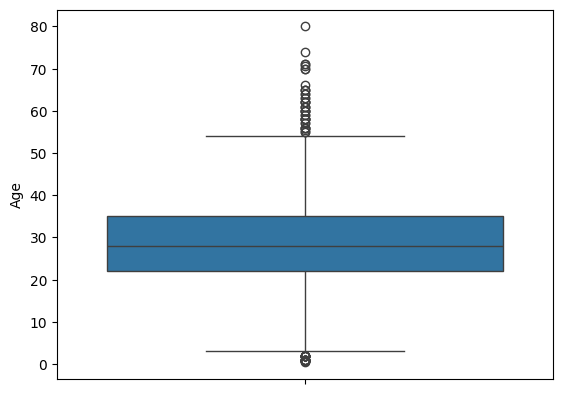

In [94]:
sns.boxplot(titanic['Age'])

In [95]:
## checking outlier for Age
q1=titanic['Age'].quantile(0.25)
q3=titanic['Age'].quantile(0.75)
IQR=q3-q1
upper_threshold=q3+(1.5*IQR)
lower_threshold=q1-(1.5*IQR)
upper_threshold,lower_threshold

(np.float64(54.5), np.float64(2.5))

In [96]:
titanic['Age']=titanic['Age'].clip(lower_threshold,upper_threshold)

In [97]:
print('skewness value of Age: ',titanic['Age'].skew())

skewness value of Age:  0.16443559235787567


<Axes: ylabel='Age'>

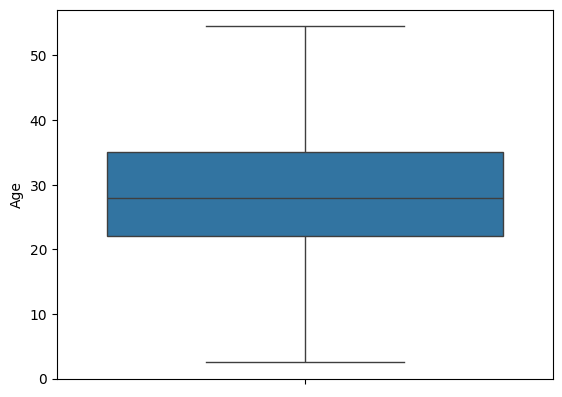

In [98]:
sns.boxplot(titanic['Age'])

<Axes: ylabel='Fare'>

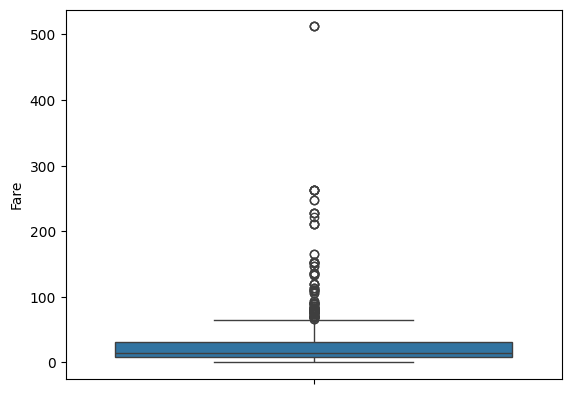

In [100]:
sns.boxplot(titanic['Fare'])

In [106]:
print('before skewness value of Fare: ',titanic['Fare'].skew())
## checking outlier for Fare
q1=titanic['Fare'].quantile(0.25)
q3=titanic['Fare'].quantile(0.75)
IQR=q3-q1
upper_threshold=q3+(1.5*IQR)
lower_threshold=q1-(1.5*IQR)
upper_threshold,lower_threshold
titanic['Fare']=titanic['Fare'].clip(lower_threshold,upper_threshold)


before skewness value of Fare:  4.787316519674893


before skewness value of Fare:  1.082178592000912


<Axes: ylabel='Fare'>

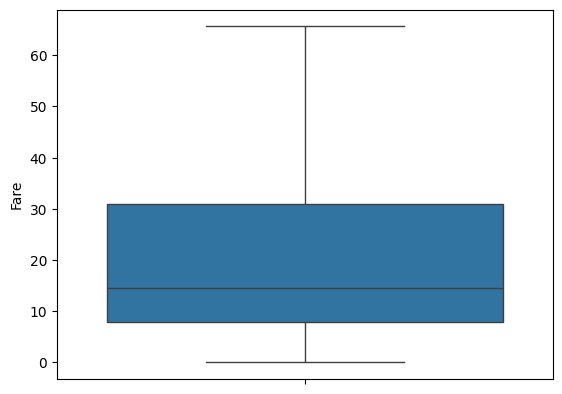

In [107]:
print('After skewness value of Fare: ',titanic['Fare'].skew())
sns.boxplot(titanic['Fare'])

<Axes: ylabel='SibSp'>

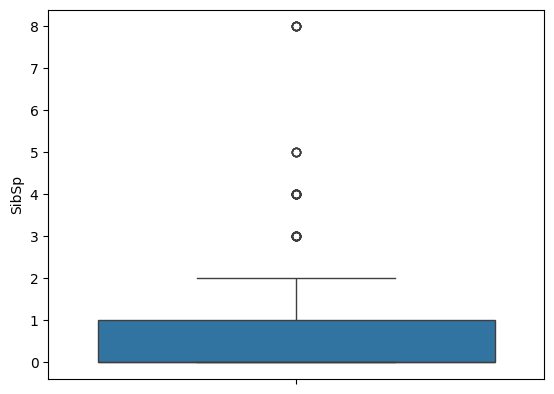

In [108]:
sns.boxplot(titanic['SibSp'])

In [110]:
print('before skewness value of SI: ',titanic['SibSp'].skew())
## checking outlier for Fare
q1=titanic['SibSp'].quantile(0.25)
q3=titanic['SibSp'].quantile(0.75)
IQR=q3-q1
upper_threshold=q3+(1.5*IQR)
lower_threshold=q1-(1.5*IQR)
upper_threshold,lower_threshold
titanic['SibSp']=titanic['SibSp'].clip(lower_threshold,upper_threshold)


before skewness value of SI:  3.6953517271630565


After skewness value of SIPSp:  1.6211541375572365


<Axes: ylabel='SibSp'>

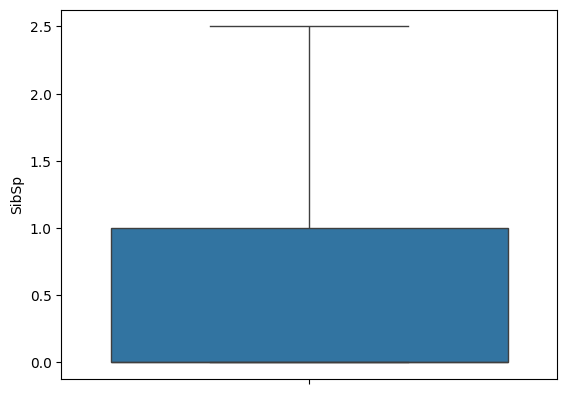

In [111]:
print('After skewness value of SIPSp: ',titanic['SibSp'].skew())
sns.boxplot(titanic['SibSp'])

<Axes: ylabel='Parch'>

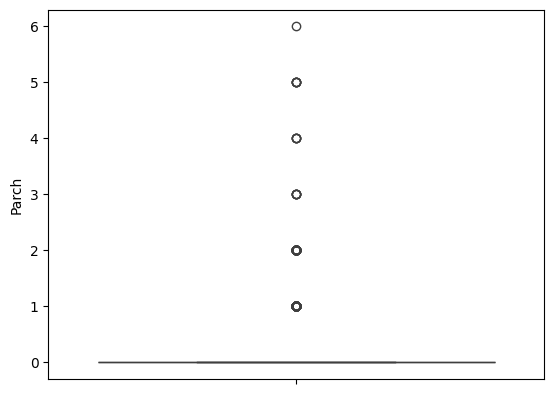

In [112]:
sns.boxplot(titanic['Parch'])

In [113]:
print('before skewness value of PArch: ',titanic['Parch'].skew())
## checking outlier for Parch
q1=titanic['Parch'].quantile(0.25)
q3=titanic['Parch'].quantile(0.75)
IQR=q3-q1
upper_threshold=q3+(1.5*IQR)
lower_threshold=q1-(1.5*IQR)
upper_threshold,lower_threshold
titanic['Parch']=titanic['Parch'].clip(lower_threshold,upper_threshold)

before skewness value of PArch:  2.7491170471010933


<Axes: ylabel='Parch'>

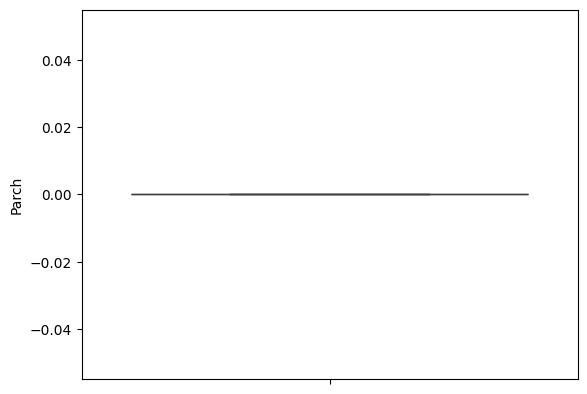

In [114]:
sns.boxplot(titanic['Parch'])

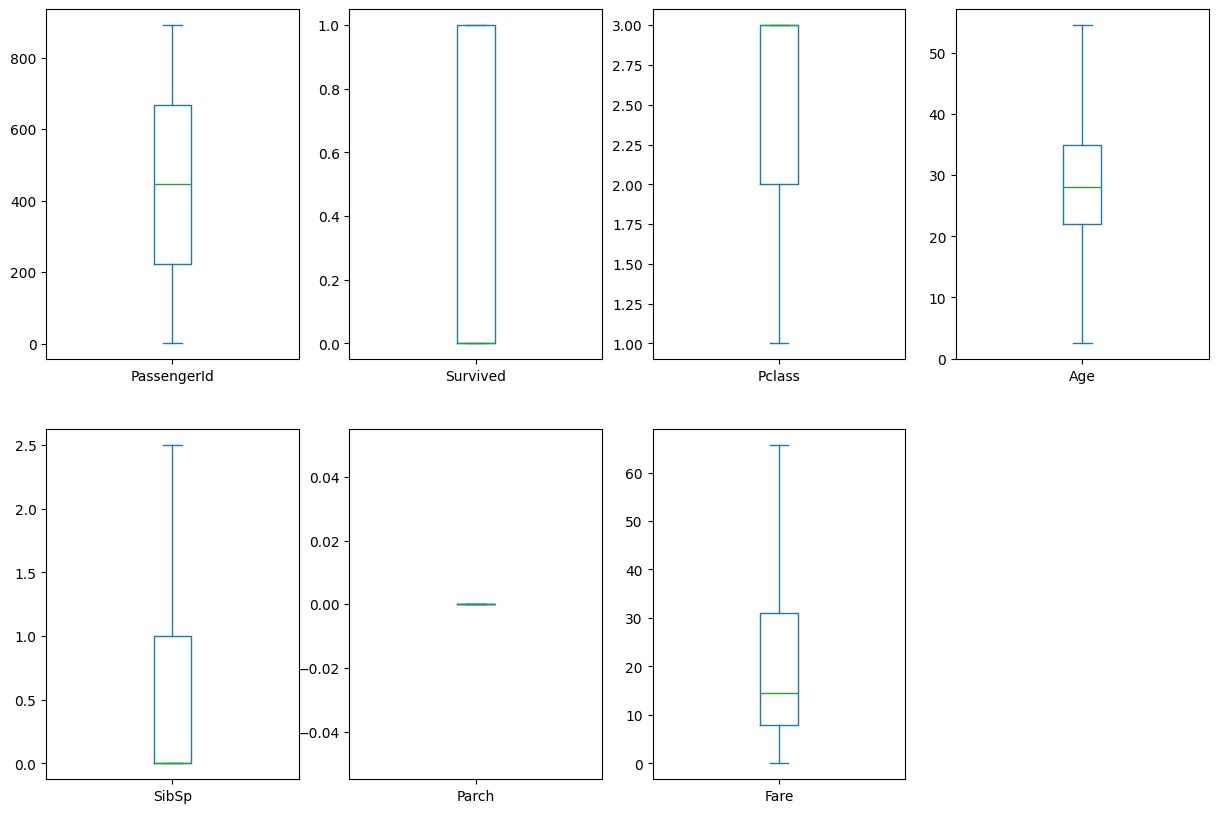

In [115]:
titanic.plot(kind='box', subplots=True, layout=(2,4), figsize=(15, 10))
plt.show()

In [116]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 76.7+ KB


In [118]:
titanic.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [119]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0,7.2500,S
1,1,1,female,38.0,1.0,0,65.6344,C
2,1,3,female,26.0,0.0,0,7.9250,S
3,1,1,female,35.0,1.0,0,53.1000,S
4,0,3,male,35.0,0.0,0,8.0500,S


In [120]:
titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [121]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [122]:
titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

C:\Users\neela\AppData\Local\Temp\ipykernel_16516\2574723303.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [123]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [124]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1.0,0,7.2500,0
1,1,1,1,38.0,1.0,0,65.6344,1
2,1,3,1,26.0,0.0,0,7.9250,0
3,1,1,1,35.0,1.0,0,53.1000,0
4,0,3,0,35.0,0.0,0,8.0500,0


<Axes: >

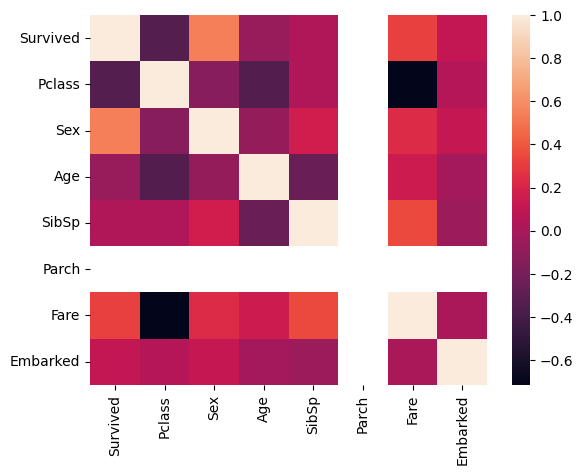

In [125]:
sns.heatmap(titanic.corr())